# 3. Solubility Fingerprint Combinations - PyTorch Version

이 노트북은 TensorFlow 버전을 PyTorch로 변환하고 최적화한 버전입니다.
- DNN 모델을 PyTorch로 구현 (SiLU activation 사용)
- Subprocess 방식으로 메모리 격리
- Windows PowerShell 환경 최적화
- Mixed precision training 지원

In [ ]:
import os
import pickle

# Check if train and test directories already exist
output_dir = "result/1_preprocess_enhanced"
train_dir = os.path.join(output_dir, "train")
test_dir = os.path.join(output_dir, "test")

if os.path.exists(train_dir) and os.path.exists(test_dir):
    print("✓ Train and test data exist. Running AD analysis only...")
    print(f"  - Train directory: {train_dir}")
    print(f"  - Test directory: {test_dir}")
    
    # Create analyzer instance
    analyzer = ConcurrentQSARAnalyzer(
        output_dir=output_dir,
        performance_mode=False,
        ad_mode='all',  # Run all AD modes
        enable_reliability_scoring=False,
        max_samples_analysis=30000
    )
    
    # Load existing data and splits
    print("\n[CHART] Loading existing data and splits...")
    analyzer._load_and_preprocess_data(df_dict, test_only_datasets)
    
    # Load existing splits from disk
    print("[CHART] Loading saved splits...")
    for name in analyzer.datasets:
        split_dir = os.path.join(output_dir, 'split_reports', name)
        if os.path.exists(split_dir):
            splits = {}
            for split_file in os.listdir(split_dir):
                if split_file.endswith('.pkl'):
                    split_name = split_file.replace('.pkl', '')
                    with open(os.path.join(split_dir, split_file), 'rb') as f:
                        splits[split_name] = pickle.load(f)
            analyzer.splits[name]['splits'] = splits
            print(f"  ✓ Loaded splits for {name}")
    
    # Calculate features
    print("\n[CHART] Calculating features...")
    analyzer._calculate_features_safe()
    
    # Run AD analysis for all modes
    if analyzer.ad_mode == 'all':
        print("\n" + "="*60)
        print("[CHART] Running AD analysis for ALL modes")
        print("="*60)
        
        analyzer.all_mode_results = {}
        modes_to_analyze = ['regulatory', 'industrial', 'research']
        
        for mode in modes_to_analyze:
            print(f"\n{'='*50}")
            print(f"[REFRESH] Analyzing with {mode.upper()} mode")
            print(f"{'='*50}")
            
            # Update mode
            analyzer.ad_mode = mode
            analyzer.ad_methods.ad_mode = mode
            analyzer.ad_methods._update_coverage_standards()
            analyzer.ad_visualizer.ad_mode = mode
            analyzer.ad_visualizer._update_coverage_standards()
            
            # AD analysis
            analyzer._perform_ad_analysis_safe()
            
            # Store results
            analyzer.all_mode_results[mode] = {
                'ad_analysis': analyzer.ad_analysis.copy(),
                'mode_info': AD_COVERAGE_MODES[mode]
            }
            
            # Statistical analysis
            analyzer._perform_statistical_analysis()
            
            # Visualizations
            analyzer._create_visualizations_sequential(mode)
            analyzer.ad_visualizer.create_all_ad_visualizations(
                analyzer.ad_analysis, analyzer.features
            )
            
            # Save results
            analyzer._save_all_results()
        
        # Create comparison visualizations
        print("\n[CHART] Creating mode comparison visualizations")
        analyzer._create_mode_comparison_visualizations()
        analyzer._create_all_modes_summary_report()
    
    print("\n✅ AD analysis completed!")
    
else:
    print("Starting full analysis (including train/test split)...")
    analyzer = run_enhanced_analysis(
        df_dict=df_dict,
        test_only_datasets=test_only_datasets,
        output_dir=output_dir,
        performance_mode=False,
        ad_analysis_mode='all',
        max_samples=30000,
        show_recommendations=False,
    )

✓ Train and test data exist. Running AD analysis only...

2025-08-03 12:51:31 - extra_code.qsar_analysis_enhanced.splitters - INFO - Created directory structure in result\1_preprocess_enhanced
2025-08-03 12:51:31 - extra_code.qsar_analysis_enhanced.splitters - INFO - Created directory structure in result\1_preprocess_enhanced
2025-08-03 12:51:31 - extra_code.qsar_analysis_enhanced.splitters - INFO - Initialized descriptor calculator with 30 descriptors
2025-08-03 12:51:31 - extra_code.qsar_analysis_enhanced.splitters - INFO - Initialized descriptor calculator with 30 descriptors
2025-08-03 12:51:31 - extra_code.qsar_analysis_enhanced.splitters - INFO - Initialized chemical quality filters
2025-08-03 12:51:31 - extra_code.qsar_analysis_enhanced.splitters - INFO - Initialized chemical quality filters



  - Train directory: result/1_preprocess_enhanced\train
  - Test directory: result/1_preprocess_enhanced\test
[LAUNCH] Concurrent QSAR Analyzer Initialized
[GRAPH] Performance Mode: [X] Disabled
[TOOL] Parallel Jobs: 1
[TOOL] Backend: ThreadPoolExecutor
[SAVE] Max Samples: 30000
[SAVE] Memory Limit: 15.4 GB
    Loaded feature cache with 903 entries
  [OK] AD Performance Analyzer initialized
  ADVisualizer initialized: mode=all, regulatory_compliant=True
  Meta path created: result\1_preprocess_enhanced\meta
  Meta path absolute: c:\Users\Lee_Seungjin\Desktop\ANO_codes\ANO_20250607\result\1_preprocess_enhanced\meta
  Statistics path created: result\1_preprocess_enhanced\statistics
  Statistics path absolute: c:\Users\Lee_Seungjin\Desktop\ANO_codes\ANO_20250607\result\1_preprocess_enhanced\statistics
  Individual stats path created: result\1_preprocess_enhanced\statistics\individual_plots
  Individual stats path absolute: c:\Users\Lee_Seungjin\Desktop\ANO_codes\ANO_20250607\result\1_pre

2025-08-03 12:58:12 - extra_code.qsar_analysis_enhanced.utils - INFO - Results saved to result\1_preprocess_enhanced\ad_analysis\by_dataset\all_datasets_results\ad_results_regulatory.json


  [OK] Created overall AD summary

[SAVE] Step 7: Saving results

[REFRESH] Analyzing with INDUSTRIAL mode

[LAB] Step 4: Performing AD analysis (mode: industrial)
    [OK] Completed 0 AD analyses

[GRAPH] Step 5: Performing statistical analysis
  Performing statistical analysis for Lovric2020_logS0...
  Performing statistical analysis for SAMPL...
  Performing statistical analysis for ws496_logS...
  Performing statistical analysis for delaney-processed...
  Performing statistical analysis for huusk...
  Performing statistical analysis for Lipophilicity...
  Performing statistical analysis for curated-solubility-dataset...
  Performing statistical analysis for BigSolDB...

[ART] Step 6: Creating visualizations
  Creating AD visualizations (mode: industrial)...
  [OK] Created overall AD summary
  Creating meta visualizations...
  Creating meta visualizations (medical/pharmaceutical focus)...
    Creating meta analysis for Lovric2020_logS0...
      Dataset meta path: result\1_preprocess

2025-08-03 13:00:04 - extra_code.qsar_analysis_enhanced.utils - INFO - Results saved to result\1_preprocess_enhanced\ad_analysis\by_dataset\all_datasets_results\ad_results_industrial.json


  [OK] Created overall AD summary

[SAVE] Step 7: Saving results

[REFRESH] Analyzing with RESEARCH mode

[LAB] Step 4: Performing AD analysis (mode: research)
    [OK] Completed 0 AD analyses

[GRAPH] Step 5: Performing statistical analysis
  Performing statistical analysis for Lovric2020_logS0...
  Performing statistical analysis for SAMPL...
  Performing statistical analysis for ws496_logS...
  Performing statistical analysis for delaney-processed...
  Performing statistical analysis for huusk...
  Performing statistical analysis for Lipophilicity...
  Performing statistical analysis for curated-solubility-dataset...
  Performing statistical analysis for BigSolDB...

[ART] Step 6: Creating visualizations
  Creating AD visualizations (mode: research)...
  [OK] Created overall AD summary
  Creating meta visualizations...
  Creating meta visualizations (medical/pharmaceutical focus)...
    Creating meta analysis for Lovric2020_logS0...
      Dataset meta path: result\1_preprocess_enhan

In [ ]:
import os
import pickle

# Check if train and test directories already exist
output_dir = "result/1_preprocess_enhanced"
train_dir = os.path.join(output_dir, "train")
test_dir = os.path.join(output_dir, "test")

if os.path.exists(train_dir) and os.path.exists(test_dir):
    print("✓ Train and test data exist. Running AD analysis only...")
    print(f"  - Train directory: {train_dir}")
    print(f"  - Test directory: {test_dir}")
    
    # Create analyzer instance
    analyzer = ConcurrentQSARAnalyzer(
        output_dir=output_dir,
        performance_mode=False,
        ad_mode='all',  # Run all AD modes
        enable_reliability_scoring=False,
        max_samples_analysis=30000
    )
    
    # Load existing data and splits
    print("\n[CHART] Loading existing data and splits...")
    analyzer._load_and_preprocess_data(df_dict, test_only_datasets)
    
    # Load existing splits from disk
    print("[CHART] Loading saved splits...")
    for name in analyzer.datasets:
        split_dir = os.path.join(output_dir, 'split_reports', name)
        if os.path.exists(split_dir):
            splits = {}
            for split_file in os.listdir(split_dir):
                if split_file.endswith('.pkl'):
                    split_name = split_file.replace('.pkl', '')
                    with open(os.path.join(split_dir, split_file), 'rb') as f:
                        splits[split_name] = pickle.load(f)
            analyzer.splits[name]['splits'] = splits
            print(f"  ✓ Loaded splits for {name}")
    
    # Calculate features
    print("\n[CHART] Calculating features...")
    analyzer._calculate_features_safe()
    
    # Run AD analysis for all modes
    if analyzer.ad_mode == 'all':
        print("\n" + "="*60)
        print("[CHART] Running AD analysis for ALL modes")
        print("="*60)
        
        analyzer.all_mode_results = {}
        modes_to_analyze = ['regulatory', 'industrial', 'research']
        
        for mode in modes_to_analyze:
            print(f"\n{'='*50}")
            print(f"[REFRESH] Analyzing with {mode.upper()} mode")
            print(f"{'='*50}")
            
            # Update mode
            analyzer.ad_mode = mode
            analyzer.ad_methods.ad_mode = mode
            analyzer.ad_methods._update_coverage_standards()
            analyzer.ad_visualizer.ad_mode = mode
            analyzer.ad_visualizer._update_coverage_standards()
            
            # AD analysis
            analyzer._perform_ad_analysis_safe()
            
            # Store results
            analyzer.all_mode_results[mode] = {
                'ad_analysis': analyzer.ad_analysis.copy(),
                'mode_info': AD_COVERAGE_MODES[mode]
            }
            
            # Statistical analysis
            analyzer._perform_statistical_analysis()
            
            # Visualizations
            analyzer._create_visualizations_sequential(mode)
            analyzer.ad_visualizer.create_all_ad_visualizations(
                analyzer.ad_analysis, analyzer.features
            )
            
            # Save results
            analyzer._save_all_results()
        
        # Create comparison visualizations
        print("\n[CHART] Creating mode comparison visualizations")
        analyzer._create_mode_comparison_visualizations()
        analyzer._create_all_modes_summary_report()
    
    print("\n✅ AD analysis completed!")
    
else:
    print("Starting full analysis (including train/test split)...")
    analyzer = run_enhanced_analysis(
        df_dict=df_dict,
        test_only_datasets=test_only_datasets,
        output_dir=output_dir,
        performance_mode=False,
        ad_analysis_mode='all',
        max_samples=30000,
        show_recommendations=False,
    )

✓ Train and test data exist. Running AD analysis only...

2025-08-03 12:51:31 - extra_code.qsar_analysis_enhanced.splitters - INFO - Created directory structure in result\1_preprocess_enhanced
2025-08-03 12:51:31 - extra_code.qsar_analysis_enhanced.splitters - INFO - Created directory structure in result\1_preprocess_enhanced
2025-08-03 12:51:31 - extra_code.qsar_analysis_enhanced.splitters - INFO - Initialized descriptor calculator with 30 descriptors
2025-08-03 12:51:31 - extra_code.qsar_analysis_enhanced.splitters - INFO - Initialized descriptor calculator with 30 descriptors
2025-08-03 12:51:31 - extra_code.qsar_analysis_enhanced.splitters - INFO - Initialized chemical quality filters
2025-08-03 12:51:31 - extra_code.qsar_analysis_enhanced.splitters - INFO - Initialized chemical quality filters



  - Train directory: result/1_preprocess_enhanced\train
  - Test directory: result/1_preprocess_enhanced\test
[LAUNCH] Concurrent QSAR Analyzer Initialized
[GRAPH] Performance Mode: [X] Disabled
[TOOL] Parallel Jobs: 1
[TOOL] Backend: ThreadPoolExecutor
[SAVE] Max Samples: 30000
[SAVE] Memory Limit: 15.4 GB
    Loaded feature cache with 903 entries
  [OK] AD Performance Analyzer initialized
  ADVisualizer initialized: mode=all, regulatory_compliant=True
  Meta path created: result\1_preprocess_enhanced\meta
  Meta path absolute: c:\Users\Lee_Seungjin\Desktop\ANO_codes\ANO_20250607\result\1_preprocess_enhanced\meta
  Statistics path created: result\1_preprocess_enhanced\statistics
  Statistics path absolute: c:\Users\Lee_Seungjin\Desktop\ANO_codes\ANO_20250607\result\1_preprocess_enhanced\statistics
  Individual stats path created: result\1_preprocess_enhanced\statistics\individual_plots
  Individual stats path absolute: c:\Users\Lee_Seungjin\Desktop\ANO_codes\ANO_20250607\result\1_pre

2025-08-03 12:58:12 - extra_code.qsar_analysis_enhanced.utils - INFO - Results saved to result\1_preprocess_enhanced\ad_analysis\by_dataset\all_datasets_results\ad_results_regulatory.json


  [OK] Created overall AD summary

[SAVE] Step 7: Saving results

[REFRESH] Analyzing with INDUSTRIAL mode

[LAB] Step 4: Performing AD analysis (mode: industrial)
    [OK] Completed 0 AD analyses

[GRAPH] Step 5: Performing statistical analysis
  Performing statistical analysis for Lovric2020_logS0...
  Performing statistical analysis for SAMPL...
  Performing statistical analysis for ws496_logS...
  Performing statistical analysis for delaney-processed...
  Performing statistical analysis for huusk...
  Performing statistical analysis for Lipophilicity...
  Performing statistical analysis for curated-solubility-dataset...
  Performing statistical analysis for BigSolDB...

[ART] Step 6: Creating visualizations
  Creating AD visualizations (mode: industrial)...
  [OK] Created overall AD summary
  Creating meta visualizations...
  Creating meta visualizations (medical/pharmaceutical focus)...
    Creating meta analysis for Lovric2020_logS0...
      Dataset meta path: result\1_preprocess

2025-08-03 13:00:04 - extra_code.qsar_analysis_enhanced.utils - INFO - Results saved to result\1_preprocess_enhanced\ad_analysis\by_dataset\all_datasets_results\ad_results_industrial.json


  [OK] Created overall AD summary

[SAVE] Step 7: Saving results

[REFRESH] Analyzing with RESEARCH mode

[LAB] Step 4: Performing AD analysis (mode: research)
    [OK] Completed 0 AD analyses

[GRAPH] Step 5: Performing statistical analysis
  Performing statistical analysis for Lovric2020_logS0...
  Performing statistical analysis for SAMPL...
  Performing statistical analysis for ws496_logS...
  Performing statistical analysis for delaney-processed...
  Performing statistical analysis for huusk...
  Performing statistical analysis for Lipophilicity...
  Performing statistical analysis for curated-solubility-dataset...
  Performing statistical analysis for BigSolDB...

[ART] Step 6: Creating visualizations
  Creating AD visualizations (mode: research)...
  [OK] Created overall AD summary
  Creating meta visualizations...
  Creating meta visualizations (medical/pharmaceutical focus)...
    Creating meta analysis for Lovric2020_logS0...
      Dataset meta path: result\1_preprocess_enhan

In [ ]:
import os
import pickle

# Check if train and test directories already exist
output_dir = "result/1_preprocess_enhanced"
train_dir = os.path.join(output_dir, "train")
test_dir = os.path.join(output_dir, "test")

if os.path.exists(train_dir) and os.path.exists(test_dir):
    print("✓ Train and test data exist. Running AD analysis only...")
    print(f"  - Train directory: {train_dir}")
    print(f"  - Test directory: {test_dir}")
    
    # Create analyzer instance
    analyzer = ConcurrentQSARAnalyzer(
        output_dir=output_dir,
        performance_mode=False,
        ad_mode='all',  # Run all AD modes
        enable_reliability_scoring=False,
        max_samples_analysis=30000
    )
    
    # Load existing data and splits
    print("\n[CHART] Loading existing data and splits...")
    analyzer._load_and_preprocess_data(df_dict, test_only_datasets)
    
    # Load existing splits from disk
    print("[CHART] Loading saved splits...")
    for name in analyzer.datasets:
        split_dir = os.path.join(output_dir, 'split_reports', name)
        if os.path.exists(split_dir):
            splits = {}
            for split_file in os.listdir(split_dir):
                if split_file.endswith('.pkl'):
                    split_name = split_file.replace('.pkl', '')
                    with open(os.path.join(split_dir, split_file), 'rb') as f:
                        splits[split_name] = pickle.load(f)
            analyzer.splits[name]['splits'] = splits
            print(f"  ✓ Loaded splits for {name}")
    
    # Calculate features
    print("\n[CHART] Calculating features...")
    analyzer._calculate_features_safe()
    
    # Run AD analysis for all modes
    if analyzer.ad_mode == 'all':
        print("\n" + "="*60)
        print("[CHART] Running AD analysis for ALL modes")
        print("="*60)
        
        analyzer.all_mode_results = {}
        modes_to_analyze = ['regulatory', 'industrial', 'research']
        
        for mode in modes_to_analyze:
            print(f"\n{'='*50}")
            print(f"[REFRESH] Analyzing with {mode.upper()} mode")
            print(f"{'='*50}")
            
            # Update mode
            analyzer.ad_mode = mode
            analyzer.ad_methods.ad_mode = mode
            analyzer.ad_methods._update_coverage_standards()
            analyzer.ad_visualizer.ad_mode = mode
            analyzer.ad_visualizer._update_coverage_standards()
            
            # AD analysis
            analyzer._perform_ad_analysis_safe()
            
            # Store results
            analyzer.all_mode_results[mode] = {
                'ad_analysis': analyzer.ad_analysis.copy(),
                'mode_info': AD_COVERAGE_MODES[mode]
            }
            
            # Statistical analysis
            analyzer._perform_statistical_analysis()
            
            # Visualizations
            analyzer._create_visualizations_sequential(mode)
            analyzer.ad_visualizer.create_all_ad_visualizations(
                analyzer.ad_analysis, analyzer.features
            )
            
            # Save results
            analyzer._save_all_results()
        
        # Create comparison visualizations
        print("\n[CHART] Creating mode comparison visualizations")
        analyzer._create_mode_comparison_visualizations()
        analyzer._create_all_modes_summary_report()
    
    print("\n✅ AD analysis completed!")
    
else:
    print("Starting full analysis (including train/test split)...")
    analyzer = run_enhanced_analysis(
        df_dict=df_dict,
        test_only_datasets=test_only_datasets,
        output_dir=output_dir,
        performance_mode=False,
        ad_analysis_mode='all',
        max_samples=30000,
        show_recommendations=False,
    )

✓ Train and test data exist. Running AD analysis only...

2025-08-03 12:51:31 - extra_code.qsar_analysis_enhanced.splitters - INFO - Created directory structure in result\1_preprocess_enhanced
2025-08-03 12:51:31 - extra_code.qsar_analysis_enhanced.splitters - INFO - Created directory structure in result\1_preprocess_enhanced
2025-08-03 12:51:31 - extra_code.qsar_analysis_enhanced.splitters - INFO - Initialized descriptor calculator with 30 descriptors
2025-08-03 12:51:31 - extra_code.qsar_analysis_enhanced.splitters - INFO - Initialized descriptor calculator with 30 descriptors
2025-08-03 12:51:31 - extra_code.qsar_analysis_enhanced.splitters - INFO - Initialized chemical quality filters
2025-08-03 12:51:31 - extra_code.qsar_analysis_enhanced.splitters - INFO - Initialized chemical quality filters



  - Train directory: result/1_preprocess_enhanced\train
  - Test directory: result/1_preprocess_enhanced\test
[LAUNCH] Concurrent QSAR Analyzer Initialized
[GRAPH] Performance Mode: [X] Disabled
[TOOL] Parallel Jobs: 1
[TOOL] Backend: ThreadPoolExecutor
[SAVE] Max Samples: 30000
[SAVE] Memory Limit: 15.4 GB
    Loaded feature cache with 903 entries
  [OK] AD Performance Analyzer initialized
  ADVisualizer initialized: mode=all, regulatory_compliant=True
  Meta path created: result\1_preprocess_enhanced\meta
  Meta path absolute: c:\Users\Lee_Seungjin\Desktop\ANO_codes\ANO_20250607\result\1_preprocess_enhanced\meta
  Statistics path created: result\1_preprocess_enhanced\statistics
  Statistics path absolute: c:\Users\Lee_Seungjin\Desktop\ANO_codes\ANO_20250607\result\1_preprocess_enhanced\statistics
  Individual stats path created: result\1_preprocess_enhanced\statistics\individual_plots
  Individual stats path absolute: c:\Users\Lee_Seungjin\Desktop\ANO_codes\ANO_20250607\result\1_pre

2025-08-03 12:58:12 - extra_code.qsar_analysis_enhanced.utils - INFO - Results saved to result\1_preprocess_enhanced\ad_analysis\by_dataset\all_datasets_results\ad_results_regulatory.json


  [OK] Created overall AD summary

[SAVE] Step 7: Saving results

[REFRESH] Analyzing with INDUSTRIAL mode

[LAB] Step 4: Performing AD analysis (mode: industrial)
    [OK] Completed 0 AD analyses

[GRAPH] Step 5: Performing statistical analysis
  Performing statistical analysis for Lovric2020_logS0...
  Performing statistical analysis for SAMPL...
  Performing statistical analysis for ws496_logS...
  Performing statistical analysis for delaney-processed...
  Performing statistical analysis for huusk...
  Performing statistical analysis for Lipophilicity...
  Performing statistical analysis for curated-solubility-dataset...
  Performing statistical analysis for BigSolDB...

[ART] Step 6: Creating visualizations
  Creating AD visualizations (mode: industrial)...
  [OK] Created overall AD summary
  Creating meta visualizations...
  Creating meta visualizations (medical/pharmaceutical focus)...
    Creating meta analysis for Lovric2020_logS0...
      Dataset meta path: result\1_preprocess

2025-08-03 13:00:04 - extra_code.qsar_analysis_enhanced.utils - INFO - Results saved to result\1_preprocess_enhanced\ad_analysis\by_dataset\all_datasets_results\ad_results_industrial.json


  [OK] Created overall AD summary

[SAVE] Step 7: Saving results

[REFRESH] Analyzing with RESEARCH mode

[LAB] Step 4: Performing AD analysis (mode: research)
    [OK] Completed 0 AD analyses

[GRAPH] Step 5: Performing statistical analysis
  Performing statistical analysis for Lovric2020_logS0...
  Performing statistical analysis for SAMPL...
  Performing statistical analysis for ws496_logS...
  Performing statistical analysis for delaney-processed...
  Performing statistical analysis for huusk...
  Performing statistical analysis for Lipophilicity...
  Performing statistical analysis for curated-solubility-dataset...
  Performing statistical analysis for BigSolDB...

[ART] Step 6: Creating visualizations
  Creating AD visualizations (mode: research)...
  [OK] Created overall AD summary
  Creating meta visualizations...
  Creating meta visualizations (medical/pharmaceutical focus)...
    Creating meta analysis for Lovric2020_logS0...
      Dataset meta path: result\1_preprocess_enhan

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import gc
import time
import subprocess
from concurrent.futures import ProcessPoolExecutor, as_completed
from pathlib import Path
import polars as pl
from typing import Dict, List, Tuple, Optional, Union
from tqdm import tqdm
import pickle
import tempfile
import platform

In [2]:
import rdkit
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator
from rdkit.Chem.MACCSkeys import GenMACCSKeys
from rdkit.Avalon.pyAvalonTools import GetAvalonFP

In [3]:
# PyTorch imports
import torch
import torch.nn as nn
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import logging

In [4]:
# Environment settings for subprocess (Windows PowerShell compatible)
import logging
# Get the current working directory
current_dir = os.path.dirname(os.path.abspath('.'))
os.environ['PYTHONPATH'] = current_dir
env = os.environ.copy()
logging.getLogger('torch').setLevel(logging.ERROR)

In [5]:
# Model hyperparameters (optimized)
RANDOM_STATE = 42
VAL_SIZE = 0.05  # 95:5 split for DNN
EPOCHS = 100
BATCHSIZE = 32
REGULARIZER = 1e-5
lr = 0.001
CV = 5

# Best activation function from previous experiments
BEST_ACTIVATION = 'silu'

In [6]:
# Split mapping
SPLIT_MAP = {
    "rm": "random",
    "sc": "scaffold",
    "cs": "chemical_space_coverage", 
    "cl": "cluster",
    "pc": "physchem",
    "ac": "activity_cliff",
    "sa": "solubility_aware",
    "ti": "time_series",
    "en": "ensemble"
}

# Dataset abbreviation mapping
DATASET_MAP = {
    "delaney-processed": "de",
    "Lovric2020_logS0": "lo",
    "ws496_logS": "ws",
    "huusk": "hu"
}

# 기본 설정
np.random.seed(RANDOM_STATE)
torch.manual_seed(RANDOM_STATE)

# Split type 선택 (None이면 모든 split 사용)
USE_SPECIFIC_SPLIT = ['sa']  # 예: 'rm' 또는 ['rm', 'cs'] 또는 None

# Dataset 선택 (None이면 모든 dataset 사용)
USE_SPECIFIC_DATASET = None 

# Fingerprint 조합 선택
SELECTED_COMBOS = {
    'morgan+maccs': ('morgan', 'maccs'),
    'morgan+avalon': ('morgan', 'avalon'),
    'maccs+avalon': ('maccs', 'avalon'),
    'morgan+maccs+avalon': ('morgan', 'maccs', 'avalon')
}

# 출력 디렉토리
OUTPUT_DIR = Path("result/3_solubility_fps_comb_pytorch")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

# 모델 타입 선택
MODEL_TYPES = ['DNN']

print(f"Configuration:")
print(f"- Split type filter: {USE_SPECIFIC_SPLIT}")
print(f"- Dataset filter: {USE_SPECIFIC_DATASET}")
print(f"- Model types: {MODEL_TYPES}")
print(f"- Best activation: {BEST_ACTIVATION}")
print(f"- Output directory: {OUTPUT_DIR}")

Configuration:
- Split type filter: ['sa']
- Dataset filter: None
- Model types: ['DNN']
- Best activation: silu
- Output directory: result\3_solubility_fps_comb_pytorch


In [7]:
# Define DNN model architecture in notebook (with best activation)
class DNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim=1024, hidden_dim2=496, dropout_rate=0.2):
        super(DNNModel, self).__init__()
        
        # Use the best activation function (SiLU)
        self.model = nn.Sequential(
            # First layer
            nn.Linear(input_dim, hidden_dim),
            nn.SiLU(),  # Best activation from experiments
            nn.BatchNorm1d(hidden_dim, momentum=0.01),  # TF default
            nn.Dropout(dropout_rate),
            
            # Second layer
            nn.Linear(hidden_dim, hidden_dim2),
            nn.SiLU(),  # Best activation from experiments
            nn.BatchNorm1d(hidden_dim2, momentum=0.01),  # TF default
            nn.Dropout(dropout_rate),
            
            # Output layer
            nn.Linear(hidden_dim2, 1)
        )
        
        # Initialize weights
        self._initialize_weights()
    
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight, gain=1.0)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
    
    def forward(self, x):
        return self.model(x)

print(f"DNN model architecture defined with {BEST_ACTIVATION} activation")

DNN model architecture defined with silu activation


In [8]:
def save_model_for_subprocess(x_data, verbose: bool = False) -> Path:
    """Save PyTorch model for subprocess to load and train"""
    model_dir = Path("save_model")
    model_path = model_dir / "pytorch_model.pth"
    model_dir.mkdir(parents=True, exist_ok=True)
    
    input_dim = x_data.shape[1]
    
    # Create model instance
    model = DNNModel(input_dim)
    
    # Save model with activation info
    torch.save({
        'model_state_dict': model.state_dict(),
        'model_config': {
            'input_dim': input_dim,
            'hidden_dim': 1024,
            'hidden_dim2': 496,
            'dropout_rate': 0.2,
            'activation': BEST_ACTIVATION
        },
        'model_class': 'DNNModelWithActivation'
    }, model_path)
    
    if verbose:
        print(f"[save_model_for_subprocess] Model with {BEST_ACTIVATION} saved at {model_path}")
        print(f"  Input dimension: {input_dim}")
        print(f"  Model parameters: {sum(p.numel() for p in model.parameters()):,}")
    
    return model_path

In [9]:
def _run_dnn_subprocess(X_train, y_train, X_test, y_test, 
                        mode="test", 
                        verbose=False):
    """Run PyTorch DNN training in subprocess - OS-agnostic implementation"""
    
    try:
        # Use OS-independent temporary directory
        temp_dir = tempfile.gettempdir()
        
        # Create temporary file paths with unique names
        pid = os.getpid()
        timestamp = int(time.time() * 1000)
        
        temp_files = {
            'X_train': os.path.join(temp_dir, f"X_train_{pid}_{timestamp}.npy"),
            'y_train': os.path.join(temp_dir, f"y_train_{pid}_{timestamp}.npy"),
            'X_test': os.path.join(temp_dir, f"X_test_{pid}_{timestamp}.npy"),
            'y_test': os.path.join(temp_dir, f"y_test_{pid}_{timestamp}.npy"),
            'predictions': os.path.join(temp_dir, f"predictions_{pid}_{timestamp}.npy")
        }
        
        # Clean up any existing files
        for filepath in temp_files.values():
            if os.path.exists(filepath):
                try:
                    os.remove(filepath)
                except:
                    pass
        
        # Ensure data is numpy arrays with correct type
        X_train = np.asarray(X_train, dtype=np.float32)
        y_train = np.asarray(y_train, dtype=np.float32)
        X_test = np.asarray(X_test, dtype=np.float32)
        y_test = np.asarray(y_test, dtype=np.float32)
        
        # Flatten y arrays if needed
        if len(y_train.shape) > 1:
            y_train = y_train.flatten()
        if len(y_test.shape) > 1:
            y_test = y_test.flatten()
            
        if verbose:
            print(f"DEBUG: Data shapes after processing:")
            print(f"  X_train: {X_train.shape}, y_train: {y_train.shape}")
            print(f"  X_test: {X_test.shape}, y_test: {y_test.shape}")
            print(f"  Platform: {platform.system()}")
            print(f"  Temp dir: {temp_dir}")
        
        # Save data to temporary files
        np.save(temp_files['X_train'], X_train)
        np.save(temp_files['y_train'], y_train)
        np.save(temp_files['X_test'], X_test)
        np.save(temp_files['y_test'], y_test)
        
        # Save model from notebook
        save_model_for_subprocess(X_train, verbose=verbose)
        
        # Prepare environment
        env_copy = os.environ.copy()
        env_copy['SAVE_PREDICTIONS'] = '1'
        env_copy['PRED_PATH'] = temp_files['predictions']
        
        # Get Python executable
        python_exe = sys.executable
        
        # Build script path in OS-independent way
        script_path = os.path.abspath(os.path.join('.', 'extra_code', 'learning_process_pytorch.py'))
        
        # Ensure script exists
        if not os.path.exists(script_path):
            raise FileNotFoundError(f"Script not found: {script_path}")
        
        # Build command
        cmd = [
            python_exe,
            script_path,            
            str(BATCHSIZE), 
            str(EPOCHS), 
            str(lr),
            temp_files['X_train'], 
            temp_files['y_train'],
            temp_files['X_test'], 
            temp_files['y_test'],
            mode
        ]
        
        if verbose:
            print(f"Running command: {' '.join(cmd[:2])}...")
            print(f"Script path: {script_path}")
            print(f"Predictions will be saved to: {temp_files['predictions']}")
        
        # Run subprocess with cross-platform settings
        proc = subprocess.run(
            cmd, 
            stdout=subprocess.PIPE, 
            stderr=subprocess.PIPE, 
            text=True,  # Use text mode (works across platforms)
            env=env_copy,
            shell=False,  # Never use shell for security and portability
            cwd=os.getcwd()  # Ensure correct working directory
        )
        
        # Check return code
        if proc.returncode != 0:
            print(f"WARNING: Subprocess exited with code {proc.returncode}")
            if proc.stderr:
                print(f"Subprocess stderr: {proc.stderr[:500]}")
        
        # Handle stderr output
        if verbose and proc.stderr:
            # Filter out common warnings
            stderr_lines = proc.stderr.strip().split('\n')
            filtered_stderr = []
            skip_patterns = ['CUDA', 'GPU', 'cuDNN', 'cuBLAS', 'TensorFlow', 'tensorflow']
            
            for line in stderr_lines:
                if not any(pattern in line for pattern in skip_patterns):
                    filtered_stderr.append(line)
            
            if filtered_stderr:
                print("Subprocess stderr:")
                print('\n'.join(filtered_stderr[:10]))  # Limit output
        
        # Parse metrics from stdout
        metrics = {'r2': 0.0, 'rmse': float('inf'), 'mae': 0.0, 'mse': float('inf')}
        
        if proc.stdout:
            for line in proc.stdout.splitlines():
                line = line.strip()
                if line.startswith("R2:"):
                    try:
                        metrics['r2'] = float(line.split(":", 1)[1].strip())
                    except:
                        pass
                elif line.startswith("RMSE:"):
                    try:
                        value = line.split(":", 1)[1].strip()
                        if value != 'inf':
                            metrics['rmse'] = float(value)
                            metrics['mse'] = metrics['rmse'] ** 2
                    except:
                        pass
                elif line.startswith("MAE:"):
                    try:
                        value = line.split(":", 1)[1].strip()
                        if value != 'inf':
                            metrics['mae'] = float(value)
                    except:
                        pass
        
        if verbose:
            print(f"Parsed metrics: {metrics}")
        
        # Load predictions with more robust error handling
        y_pred = None
        
        # Wait a bit for file to be written
        time.sleep(0.5)
        
        # Check if the expected file exists
        if os.path.exists(temp_files['predictions']):
            try:
                y_pred = np.load(temp_files['predictions'])
                
                # Validate shape
                if y_pred.shape[0] != y_test.shape[0]:
                    print(f"Warning: Prediction shape mismatch. Expected {y_test.shape[0]}, got {y_pred.shape[0]}")
                    y_pred = np.zeros_like(y_test)
                else:
                    if verbose:
                        print(f"Successfully loaded predictions from {temp_files['predictions']}")
                
                # Clean up the predictions file
                try:
                    os.remove(temp_files['predictions'])
                except:
                    pass
                    
            except Exception as e:
                print(f"Error loading predictions: {e}")
                y_pred = np.zeros_like(y_test)
        else:
            # If predictions file not found at expected location, check stdout for info
            if verbose and proc.stdout:
                print("Subprocess output (last 500 chars):")
                print(proc.stdout[-500:])
            
            print("Warning: Predictions file not found, using zeros")
            y_pred = np.zeros_like(y_test)
        
        # Clean up temporary files
        for filepath in temp_files.values():
            if os.path.exists(filepath):
                try:
                    os.remove(filepath)
                except:
                    pass
        
        gc.collect()
        
        return y_pred, metrics
                
    except Exception as e:
        print(f"❌ Exception in DNN subprocess: {e}")
        import traceback
        traceback.print_exc()
        
        # Clean up on error
        if 'temp_files' in locals():
            for filepath in temp_files.values():
                if os.path.exists(filepath):
                    try:
                        os.remove(filepath)
                    except:
                        pass
        
        return np.zeros_like(y_test), {'r2': 0.0, 'rmse': float('inf'), 'mae': 0.0, 'mse': float('inf')}

In [10]:
# Import fingerprint and data loading functions from original notebook
from extra_code.molecular_loader_with_fp import (
    load_split_data,
    extract_xy_from_data,
    build_fingerprints_for_splits
)

In [11]:
def get_combined_fingerprints(fp_map: dict, 
                             split_type: str, 
                             dataset: str,
                             fp_combo: Tuple[str, ...],
                             phase: str = 'train') -> np.ndarray:
    """
    여러 fingerprint 타입을 결합한 feature 행렬을 반환합니다.
    """
    key = f"{dataset}_{phase}"
    
    # 각 fingerprint 타입별로 데이터 수집
    fp_arrays = []
    for fp_type in fp_combo:
        if fp_type in fp_map[split_type][key]:
            fp_array = fp_map[split_type][key][fp_type]
            fp_arrays.append(fp_array)
        else:
            raise KeyError(f"Fingerprint type '{fp_type}' not found for {split_type}/{key}")
    
    # 수평으로 결합
    combined = np.hstack(fp_arrays)
    return combined

In [12]:
def prepare_all_fingerprint_combinations(fp_map: dict, 
                                        y_map: dict,
                                        splits: Optional[List[str]] = None,
                                        datasets: Optional[List[str]] = None,
                                        fp_combinations: Optional[Dict[str, Tuple[str, ...]]] = None) -> dict:
    """
    모든 split, dataset, fingerprint 조합에 대한 데이터를 준비합니다.
    """
    
    if splits is None:
        splits = list(fp_map.keys())
    
    if datasets is None:
        # Dataset 필터링 적용
        if USE_SPECIFIC_DATASET is not None:
            if isinstance(USE_SPECIFIC_DATASET, str):
                datasets = [USE_SPECIFIC_DATASET]
            else:
                datasets = USE_SPECIFIC_DATASET
        else:
            datasets = ['de', 'lo', 'ws', 'hu']
    
    if fp_combinations is None:
        fp_combinations = SELECTED_COMBOS
    
    combined_data = {}
    
    for split_type in splits:
        combined_data[split_type] = {}
        
        for dataset in datasets:
            combined_data[split_type][dataset] = {}
            
            train_key = f"{dataset}_train"
            test_key = f"{dataset}_test"
            
            # 이 split/dataset 조합이 존재하는지 확인
            if train_key not in fp_map[split_type] or test_key not in fp_map[split_type]:
                print(f"Skipping {split_type}/{dataset}: missing train or test data")
                continue
            
            # y 값 가져오기
            y_train = np.array(y_map[split_type][train_key])
            y_test = np.array(y_map[split_type][test_key])
            
            for combo_name, fp_combo in fp_combinations.items():
                try:
                    # fingerprint 조합 생성
                    X_train = get_combined_fingerprints(fp_map, split_type, dataset, fp_combo, 'train')
                    X_test = get_combined_fingerprints(fp_map, split_type, dataset, fp_combo, 'test')
                    
                    combined_data[split_type][dataset][combo_name] = {
                        'X_train': X_train,
                        'X_test': X_test,
                        'y_train': y_train,
                        'y_test': y_test,
                        'fingerprints': fp_combo,
                        'n_features': X_train.shape[1]
                    }
                    
                except Exception as e:
                    print(f"Error processing {split_type}/{dataset}/{combo_name}: {e}")
                    continue
    
    return combined_data

In [13]:
# CV 훈련 함수
def train_model_cv(model_type, X_train, y_train, X_test, y_test, n_folds=5):
    """Train model with k-fold cross-validation"""
    
    # Ensure arrays are numpy arrays
    X_train = np.asarray(X_train)
    X_test = np.asarray(X_test)
    y_train = np.asarray(y_train)
    y_test = np.asarray(y_test)
    
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=RANDOM_STATE)
    
    cv_predictions = []
    test_predictions = []
    
    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
        print(f"    Fold {fold+1}/{n_folds}", end='\r')
        
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]
        
        if model_type == 'DNN':
            # DNN subprocess로 처리
            test_pred, _ = _run_dnn_subprocess(
                X_tr, y_tr, X_test, y_test, 
                mode="cv",
            )
            test_predictions.append(test_pred)
    
    # Average predictions across folds
    y_pred = np.mean(test_predictions, axis=0)
    
    return y_pred, test_predictions

In [14]:
# Simple 훈련 함수
def train_model_simple(model_type, X_train, y_train, X_test, y_test):
    """Train model with simple train/test split"""
    
    # Ensure arrays are numpy arrays
    X_train = np.asarray(X_train)
    X_test = np.asarray(X_test)
    y_train = np.asarray(y_train)
    y_test = np.asarray(y_test)
    
    if model_type == 'DNN':
        y_pred, _ = _run_dnn_subprocess(
            X_train, y_train, X_test, y_test, 
            mode="test",
        )        
        return y_pred, None

In [15]:
def run_fingerprint_combination_experiments(combined_data, model_types=None):
    """fingerprint 조합 실험 실행 - CV와 Simple 둘 다"""
    
    if model_types is None:
        model_types = MODEL_TYPES
    
    all_results = []
    predictions_by_combo = {}
    
    print(f"Running experiments with models: {model_types}")
    
    for split_type in combined_data:
        print(f"\n{'='*60}")
        print(f"Split Type: {split_type}")
        print(f"{'='*60}")
        
        predictions_by_combo[split_type] = {}
        
        # 각 fingerprint 조합별로 처리
        for combo_name in SELECTED_COMBOS.keys():
            print(f"\nProcessing {combo_name}:")
            predictions_by_combo[split_type][combo_name] = {}
            
            # 각 데이터셋별로 학습
            for dataset in ['de', 'lo', 'ws', 'hu']:
                if dataset not in combined_data[split_type]:
                    continue
                if combo_name not in combined_data[split_type][dataset]:
                    continue
                    
                print(f"  Dataset: {dataset}")
                data = combined_data[split_type][dataset][combo_name]
                
                predictions_by_combo[split_type][combo_name][dataset] = {
                    'y_true': data['y_test'],
                    'predictions': {}
                }
                
                # Scale features for DNN
                from sklearn.preprocessing import StandardScaler
                scaler = StandardScaler()
                X_train_scaled = scaler.fit_transform(data['X_train'])
                X_test_scaled = scaler.transform(data['X_test'])
                
                for model_type in model_types:
                    print(f"    Model: {model_type}")
                    
                    # Simple training
                    try:
                        y_pred_simple, _ = train_model_simple(
                            model_type, 
                            X_train_scaled, data['y_train'],
                            X_test_scaled, data['y_test']
                        )
                        
                        metrics_simple = {
                            'r2': r2_score(data['y_test'], y_pred_simple),
                            'rmse': np.sqrt(mean_squared_error(data['y_test'], y_pred_simple)),
                            'mae': mean_absolute_error(data['y_test'], y_pred_simple),
                            'mse': mean_squared_error(data['y_test'], y_pred_simple)
                        }
                        
                        predictions_by_combo[split_type][combo_name][dataset]['predictions'][f'{model_type}_simple'] = {
                            'y_pred': y_pred_simple,
                            'metrics': metrics_simple
                        }
                        
                        result_simple = {
                            'split': split_type,
                            'dataset': dataset,
                            'combination': combo_name,
                            'model': model_type,
                            'training': 'simple',
                            'test_r2': metrics_simple['r2'],
                            'test_rmse': metrics_simple['rmse'],
                            'test_mae': metrics_simple['mae'],
                            'test_mse': metrics_simple['mse'],
                            'n_features': data['n_features']
                        }
                        all_results.append(result_simple)
                        
                        print(f"      Simple: R² = {metrics_simple['r2']:.3f}")
                        
                    except Exception as e:
                        print(f"      Simple training error: {e}")
                    
                    # CV training
                    try:
                        y_pred_cv, cv_preds = train_model_cv(
                            model_type,
                            X_train_scaled, data['y_train'],
                            X_test_scaled, data['y_test'],
                            n_folds=CV
                        )
                        
                        metrics_cv = {
                            'r2': r2_score(data['y_test'], y_pred_cv),
                            'rmse': np.sqrt(mean_squared_error(data['y_test'], y_pred_cv)),
                            'mae': mean_absolute_error(data['y_test'], y_pred_cv),
                            'mse': mean_squared_error(data['y_test'], y_pred_cv)
                        }
                        
                        # Calculate std from fold predictions
                        cv_pred_array = np.array(cv_preds)
                        fold_metrics = []
                        for fold_pred in cv_preds:
                            fold_metric = {
                                'r2': r2_score(data['y_test'], fold_pred),
                                'rmse': np.sqrt(mean_squared_error(data['y_test'], fold_pred)),
                                'mae': mean_absolute_error(data['y_test'], fold_pred)
                            }
                            fold_metrics.append(fold_metric)
                        
                        r2_std = np.std([m['r2'] for m in fold_metrics])
                        rmse_std = np.std([m['rmse'] for m in fold_metrics])
                        mae_std = np.std([m['mae'] for m in fold_metrics])
                        
                        predictions_by_combo[split_type][combo_name][dataset]['predictions'][f'{model_type}_cv'] = {
                            'y_pred': y_pred_cv,
                            'cv_preds': cv_preds,
                            'metrics': metrics_cv
                        }
                        
                        result_cv = {
                            'split': split_type,
                            'dataset': dataset,
                            'combination': combo_name,
                            'model': model_type,
                            'training': 'cv',
                            'test_r2': metrics_cv['r2'],
                            'test_r2_std': r2_std,
                            'test_rmse': metrics_cv['rmse'],
                            'test_rmse_std': rmse_std,
                            'test_mae': metrics_cv['mae'],
                            'test_mae_std': mae_std,
                            'test_mse': metrics_cv['mse'],
                            'n_features': data['n_features']
                        }
                        all_results.append(result_cv)
                        
                        print(f"      CV: R² = {metrics_cv['r2']:.3f} ± {r2_std:.3f}")
                        
                    except Exception as e:
                        print(f"      CV training error: {e}")
    
    # DataFrame으로 변환 및 저장
    results_df = pd.DataFrame(all_results)
    results_df.to_csv(OUTPUT_DIR / "fingerprint_combination_results_pytorch.csv", index=False)
    print(f"\nResults saved to {OUTPUT_DIR / 'fingerprint_combination_results_pytorch.csv'}")
    
    # Save predictions
    with open(OUTPUT_DIR / "all_predictions_pytorch.pkl", 'wb') as f:
        pickle.dump(predictions_by_combo, f)
    
    return results_df, predictions_by_combo

## Data Loading and Fingerprint Generation

In [16]:
# 데이터 로드
print("Loading data...")
data_dict = load_split_data('./result/1_preprocess')
x_map, y_map = extract_xy_from_data(data_dict)

# Split type 필터링
if USE_SPECIFIC_SPLIT is not None:
    if isinstance(USE_SPECIFIC_SPLIT, str):
        splits_to_use = [USE_SPECIFIC_SPLIT]
    else:
        splits_to_use = USE_SPECIFIC_SPLIT
    
    x_map = {k: v for k, v in x_map.items() if k in splits_to_use}
    y_map = {k: v for k, v in y_map.items() if k in splits_to_use}
    print(f"Filtered to splits: {splits_to_use}")
else:
    splits_to_use = list(x_map.keys())
    print(f"Using all splits: {splits_to_use}")

Loading data...

Loaded data from result\1_preprocess
  rm: 8 files
  sc: 8 files
  cs: 8 files
  cl: 8 files
  pc: 8 files
  ac: 8 files
  sa: 8 files
  ti: 8 files
  en: 8 files
Total files loaded: 72

Extracted 33696 total samples from 9 splits
Filtered to splits: ['sa']


In [17]:
# Fingerprint 로드 또는 생성
print("Loading/generating fingerprints...")
out_root = Path("./result/fingerprint")
fp_map = build_fingerprints_for_splits(x_map, out_root)

Loading/generating fingerprints...


Generating fingerprints: 100%|██████████| 8/8 [00:00<00:00, 47.69it/s]


In [18]:
# 조합 데이터 준비
print("Preparing fingerprint combinations...")
combined_data = prepare_all_fingerprint_combinations(fp_map, y_map)

Preparing fingerprint combinations...


## Run Experiments

In [19]:
# 실험 실행 (CV 포함)
print("\nRunning experiments with PyTorch DNN...")
print(f"Using {BEST_ACTIVATION} activation function\n")
results_df, predictions_by_combo = run_fingerprint_combination_experiments(combined_data)


Running experiments with PyTorch DNN...
Using silu activation function

Running experiments with models: ['DNN']

Split Type: sa

Processing morgan+maccs:
  Dataset: de
    Model: DNN
      Simple: R² = 0.721
      CV: R² = 0.715 ± 0.018
  Dataset: lo
    Model: DNN
      Simple: R² = 0.482
      CV: R² = 0.491 ± 0.018
  Dataset: ws
    Model: DNN
      Simple: R² = 0.667
      CV: R² = 0.659 ± 0.064
  Dataset: hu
    Model: DNN
      Simple: R² = 0.764
      CV: R² = 0.740 ± 0.019

Processing morgan+avalon:
  Dataset: de
    Model: DNN
      Simple: R² = 0.751
      CV: R² = 0.750 ± 0.013
  Dataset: lo
    Model: DNN
      Simple: R² = 0.546
      CV: R² = 0.517 ± 0.045
  Dataset: ws
    Model: DNN
      Simple: R² = 0.721
      CV: R² = 0.716 ± 0.029
  Dataset: hu
    Model: DNN
      Simple: R² = 0.780
      CV: R² = 0.776 ± 0.013

Processing maccs+avalon:
  Dataset: de
    Model: DNN
      Simple: R² = 0.833
      CV: R² = 0.836 ± 0.010
  Dataset: lo
    Model: DNN
      Simple: R

## Results Summary

In [20]:
# 결과 요약
print("\n" + "="*60)
print("PERFORMANCE SUMMARY")
print("="*60)

# Simple vs CV 비교
print("\nSimple vs CV Training:")
training_comparison = results_df.groupby(['model', 'training'])['test_r2'].agg(['mean', 'std'])
print(training_comparison.round(3))

# 최고 성능 모델
print("\nBest performing models:")
for training in ['simple', 'cv']:
    training_df = results_df[results_df['training'] == training]
    best_5 = training_df.nlargest(5, 'test_r2')[['split', 'dataset', 'combination', 'model', 'test_r2']]
    print(f"\n{training.upper()} Training Top 5:")
    for _, row in best_5.iterrows():
        if training == 'cv' and 'test_r2_std' in training_df.columns:
            std_val = training_df[(training_df['split'] == row['split']) & 
                                (training_df['dataset'] == row['dataset']) & 
                                (training_df['combination'] == row['combination']) & 
                                (training_df['model'] == row['model'])]['test_r2_std'].values[0]
            print(f"  {row['split']}/{row['dataset']}/{row['combination']} - {row['model']}: R² = {row['test_r2']:.3f} ± {std_val:.3f}")
        else:
            print(f"  {row['split']}/{row['dataset']}/{row['combination']} - {row['model']}: R² = {row['test_r2']:.3f}")

# 조합별 평균 성능
print("\nAverage R² by fingerprint combination:")
combo_avg = results_df.groupby('combination')['test_r2'].mean().sort_values(ascending=False)
for combo, avg_r2 in combo_avg.items():
    print(f"  {combo}: {avg_r2:.3f}")


PERFORMANCE SUMMARY

Simple vs CV Training:
                 mean    std
model training              
DNN   cv        0.712  0.113
      simple    0.716  0.112

Best performing models:

SIMPLE Training Top 5:
  sa/hu/maccs+avalon - DNN: R² = 0.851
  sa/de/maccs+avalon - DNN: R² = 0.833
  sa/ws/maccs+avalon - DNN: R² = 0.827
  sa/hu/morgan+maccs+avalon - DNN: R² = 0.820
  sa/hu/morgan+avalon - DNN: R² = 0.780

CV Training Top 5:
  sa/hu/maccs+avalon - DNN: R² = 0.847 ± 0.021
  sa/de/maccs+avalon - DNN: R² = 0.836 ± 0.010
  sa/hu/morgan+maccs+avalon - DNN: R² = 0.805 ± 0.013
  sa/ws/morgan+maccs+avalon - DNN: R² = 0.798 ± 0.021
  sa/ws/maccs+avalon - DNN: R² = 0.790 ± 0.071

Average R² by fingerprint combination:
  maccs+avalon: 0.779
  morgan+maccs+avalon: 0.727
  morgan+avalon: 0.695
  morgan+maccs: 0.655


## Visualization Functions

In [21]:
# Visualization functions from original notebook
def vis_fp_combinations_comparison(predictions_by_combo, split_type, dataset, output_dir):
    """
    하나의 split/dataset에 대해 4가지 fingerprint 조합의 성능을 비교
    """
    plt.rcParams.update({
        "grid.linestyle":"--", "grid.alpha":0.7,
        "axes.edgecolor":"#333333", "axes.linewidth":1.1,
        "font.size":13
    })
    
    cmap = plt.get_cmap("tab20")
    colors = [cmap(i) for i in range(cmap.N)]
    markers = ["o","s","D","P","X","^","v","<",">","h","8","p","*","H"]
    from matplotlib.font_manager import FontProperties
    mono = FontProperties(family="monospace", size=10)
    
    # Dataset 이름 매핑
    dataset_names = {
        'de': 'Delaney',
        'lo': 'Lovrić', 
        'ws': 'WS496',
        'hu': 'Huuskonen'
    }
    
    # Fingerprint 조합들
    fp_combinations = ['morgan+maccs', 'morgan+avalon', 'maccs+avalon', 'morgan+maccs+avalon']
    
    # 2x2 subplot 생성
    fig, axes = plt.subplots(2, 2, figsize=(16, 14), constrained_layout=True)
    axes = axes.flatten()
    
    fig.suptitle(f"{split_type.upper()} – {dataset_names.get(dataset, dataset)} – Fingerprint Combinations Comparison", 
                 fontsize=18, fontweight="bold")
    
    # 각 fingerprint 조합별로 subplot 생성
    for i, combo_name in enumerate(fp_combinations):
        ax = axes[i]
        
        # 해당 조합의 데이터가 있는지 확인
        if (combo_name not in predictions_by_combo[split_type] or 
            dataset not in predictions_by_combo[split_type][combo_name]):
            ax.text(0.5, 0.5, 'No Data', ha='center', va='center', 
                   transform=ax.transAxes, fontsize=14, color='gray')
            ax.set_title(combo_name.replace('+', ' + '), fontweight="bold")
            continue
        
        data = predictions_by_combo[split_type][combo_name][dataset]
        y_true = data['y_true']
        
        # 모든 데이터의 min/max 찾기
        all_values = [y_true]
        for model_key in data['predictions']:
            all_values.append(data['predictions'][model_key]['y_pred'])
        all_values = np.concatenate(all_values)
        
        min_val = all_values.min()
        max_val = all_values.max()
        
        # 대각선 그리기
        ax.plot([min_val, max_val], [min_val, max_val],
                "--", color="#666666", linewidth=1.2, zorder=1)
        
        # 각 모델별로 scatter plot
        model_idx = 0
        for model_key in sorted(data['predictions'].keys()):
            pred_data = data['predictions'][model_key]
            y_pred = pred_data['y_pred']
            r2 = pred_data['metrics']['r2']
            
            # 모델 이름과 타입 분리
            if '_simple' in model_key:
                model_name = model_key.replace('_simple', '')
                training_type = 'SI'
            else:
                model_name = model_key.replace('_cv', '')
                training_type = 'CV'
            
            ax.scatter(y_true, y_pred,
                      s=55,
                      marker=markers[model_idx % len(markers)],
                      color=colors[model_idx % len(colors)],
                      edgecolors="k",
                      linewidths=0.6,
                      alpha=0.85,
                      label=f"{model_name} ({training_type}): R²={r2:>6.3f}")
            
            model_idx += 1
        
        ax.set_xlabel("True LogS", fontsize=12)
        ax.set_ylabel("Predicted LogS", fontsize=12)
        ax.set_title(combo_name.replace('+', ' + '), fontsize=14, fontweight="bold")
        ax.legend(loc="lower right", prop=mono, fontsize=8)
        ax.grid(True)
        ax.set_xlim(min_val, max_val)
        ax.set_ylim(min_val, max_val)
    
    # 저장
    plot_dir = output_dir / "plots" / "fp_comparison"
    plot_dir.mkdir(parents=True, exist_ok=True)
    fname = plot_dir / f"{split_type}_{dataset}_fp_combinations_comparison.png"
    plt.savefig(fname, dpi=300, bbox_inches="tight")
    plt.show()
    print(f"📈  {fname.name} saved")

In [22]:
def vis_fp_combinations_bar_comparison(predictions_by_combo, split_type, dataset, output_dir, results_df):
    """
    하나의 split/dataset에 대해 4가지 fingerprint 조합의 R² 성능을 막대그래프로 비교
    """
    plt.rcParams.update({
        "grid.linestyle":"--", "grid.alpha":0.7,
        "axes.edgecolor":"#333333", "axes.linewidth":1.1,
        "font.size":13
    })
    
    # Dataset 이름 매핑
    dataset_names = {
        'de': 'Delaney',
        'lo': 'Lovrić',
        'ws': 'WS496', 
        'hu': 'Huuskonen'
    }
    
    # Fingerprint 조합들
    fp_combinations = ['morgan+maccs', 'morgan+avalon', 'maccs+avalon', 'morgan+maccs+avalon']
    fp_labels = ['Morgan + MACCS', 'Morgan + Avalon', 'MACCS + Avalon', 'Morgan + MACCS + Avalon']
    
    # 데이터 수집
    simple_r2 = []
    cv_r2 = []
    cv_std = []
    
    for combo_name in fp_combinations:
        if (combo_name in predictions_by_combo[split_type] and 
            dataset in predictions_by_combo[split_type][combo_name]):
            
            data = predictions_by_combo[split_type][combo_name][dataset]
            
            # Simple training R²
            simple_key = None
            cv_key = None
            for key in data['predictions'].keys():
                if '_simple' in key:
                    simple_key = key
                elif '_cv' in key:
                    cv_key = key
            
            simple_r2.append(data['predictions'][simple_key]['metrics']['r2'] if simple_key else 0)
            cv_r2.append(data['predictions'][cv_key]['metrics']['r2'] if cv_key else 0)
            
            # Get std from results_df
            cv_row = results_df[(results_df['split'] == split_type) & 
                               (results_df['dataset'] == dataset) & 
                               (results_df['combination'] == combo_name) & 
                               (results_df['training'] == 'cv')]
            if not cv_row.empty and 'test_r2_std' in cv_row.columns:
                cv_std.append(cv_row['test_r2_std'].values[0])
            else:
                cv_std.append(0)
        else:
            simple_r2.append(0)
            cv_r2.append(0)
            cv_std.append(0)
    
    # 그래프 생성
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    x = np.arange(len(fp_labels))
    width = 0.35
    
    bars1 = ax.bar(x - width/2, simple_r2, width, label='Simple Training', 
                   color='skyblue', edgecolor='black', linewidth=0.5)
    bars2 = ax.bar(x + width/2, cv_r2, width, label='CV Training',
                   color='lightcoral', edgecolor='black', linewidth=0.5,
                   yerr=cv_std, capsize=5)
    
    # 값 표시
    for i, (s_r2, c_r2, c_std) in enumerate(zip(simple_r2, cv_r2, cv_std)):
        ax.text(i - width/2, s_r2 + 0.01, f'{s_r2:.3f}', ha='center', va='bottom', fontsize=10)
        ax.text(i + width/2, c_r2 + c_std + 0.01, f'{c_r2:.3f}', ha='center', va='bottom', fontsize=10)
    
    ax.set_xlabel('Fingerprint Combinations', fontsize=14)
    ax.set_ylabel('R² Score', fontsize=14)
    ax.set_title(f'{split_type.upper()} – {dataset_names.get(dataset, dataset)} – Fingerprint Performance Comparison', 
                 fontsize=16, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(fp_labels, rotation=45, ha='right')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, max(max(simple_r2), max(cv_r2)) * 1.15)
    
    plt.tight_layout()
    
    # 저장
    plot_dir = output_dir / "plots" / "fp_comparison"
    plot_dir.mkdir(parents=True, exist_ok=True)
    fname = plot_dir / f"{split_type}_{dataset}_fp_bar_comparison.png"
    plt.savefig(fname, dpi=300, bbox_inches="tight")
    plt.show()
    print(f"📊  {fname.name} saved")


Generating fingerprint comparison plots...


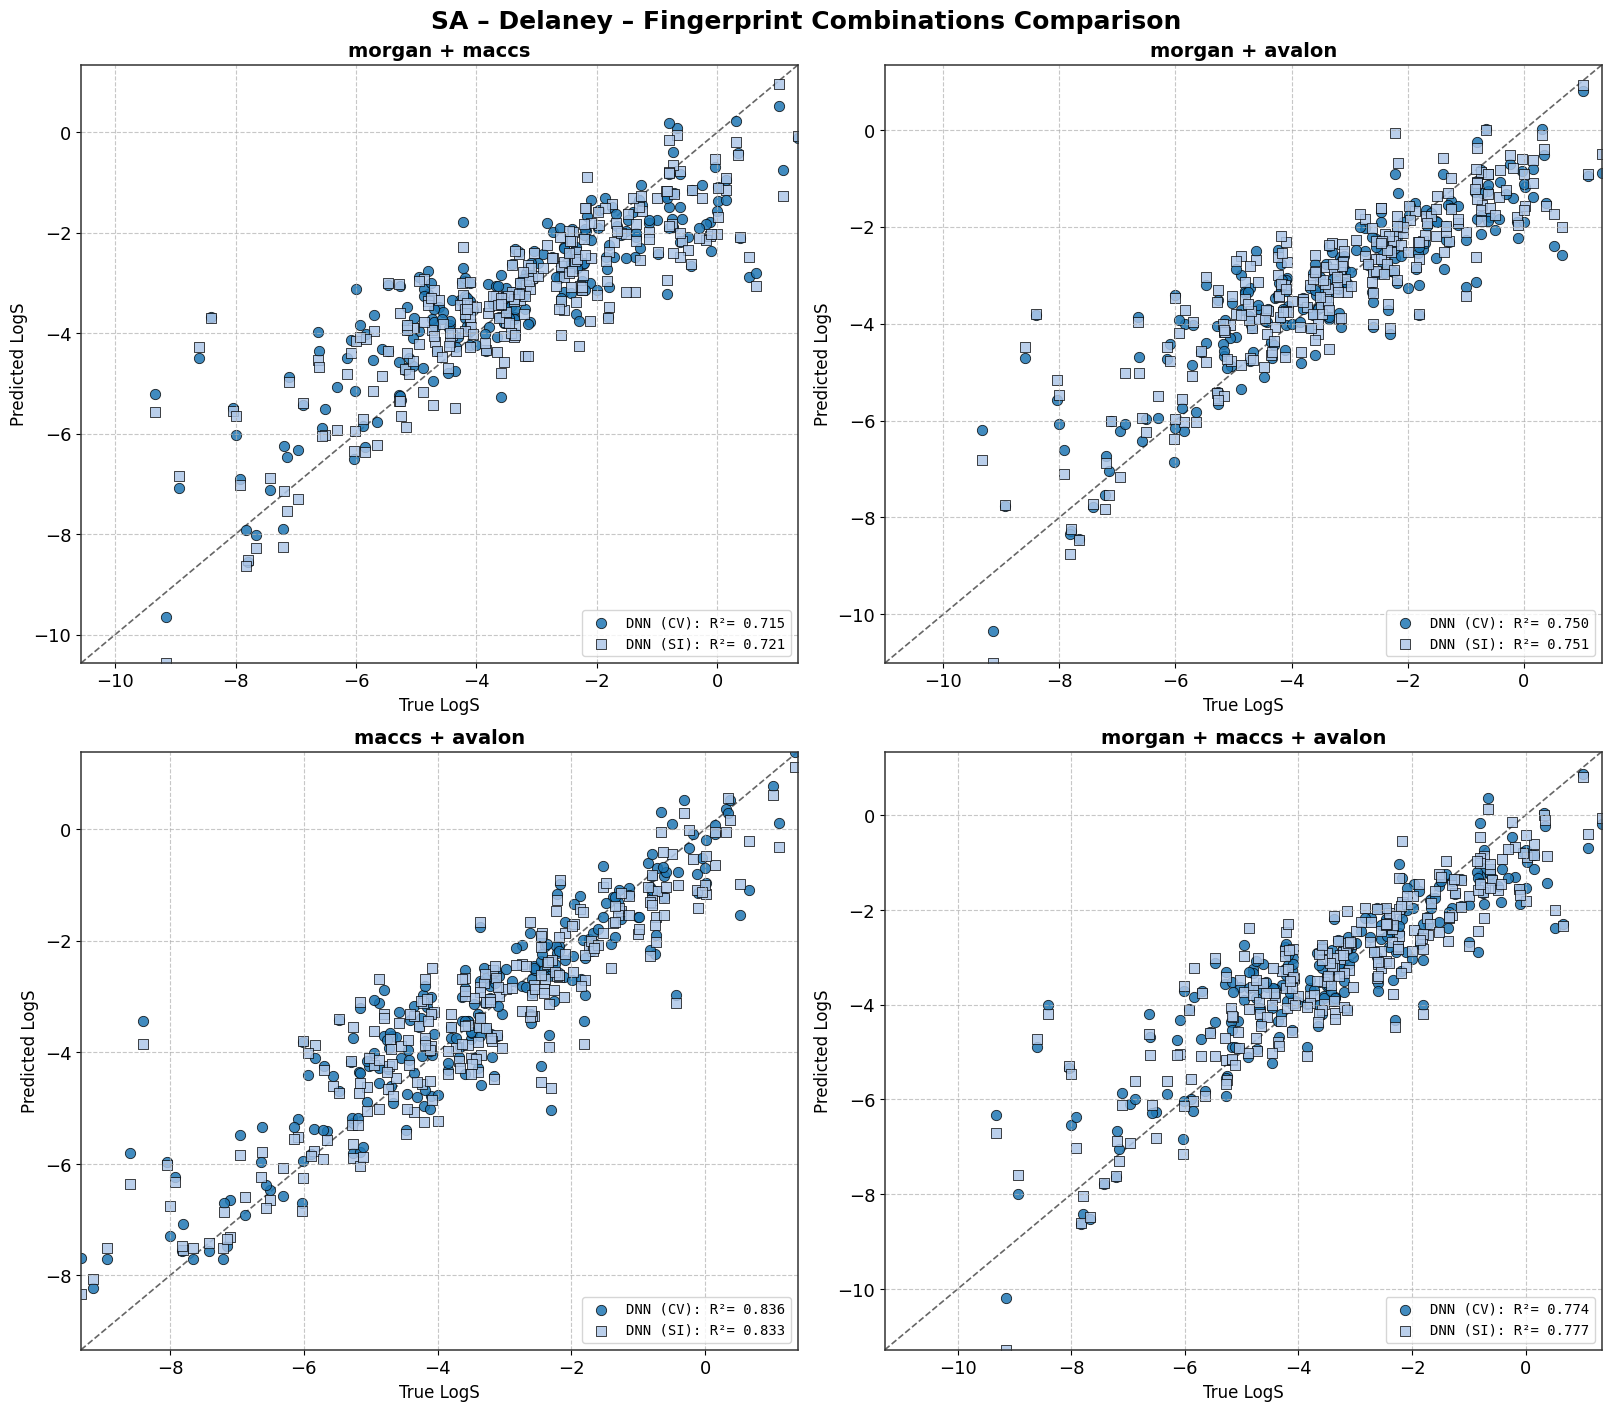

📈  sa_de_fp_combinations_comparison.png saved


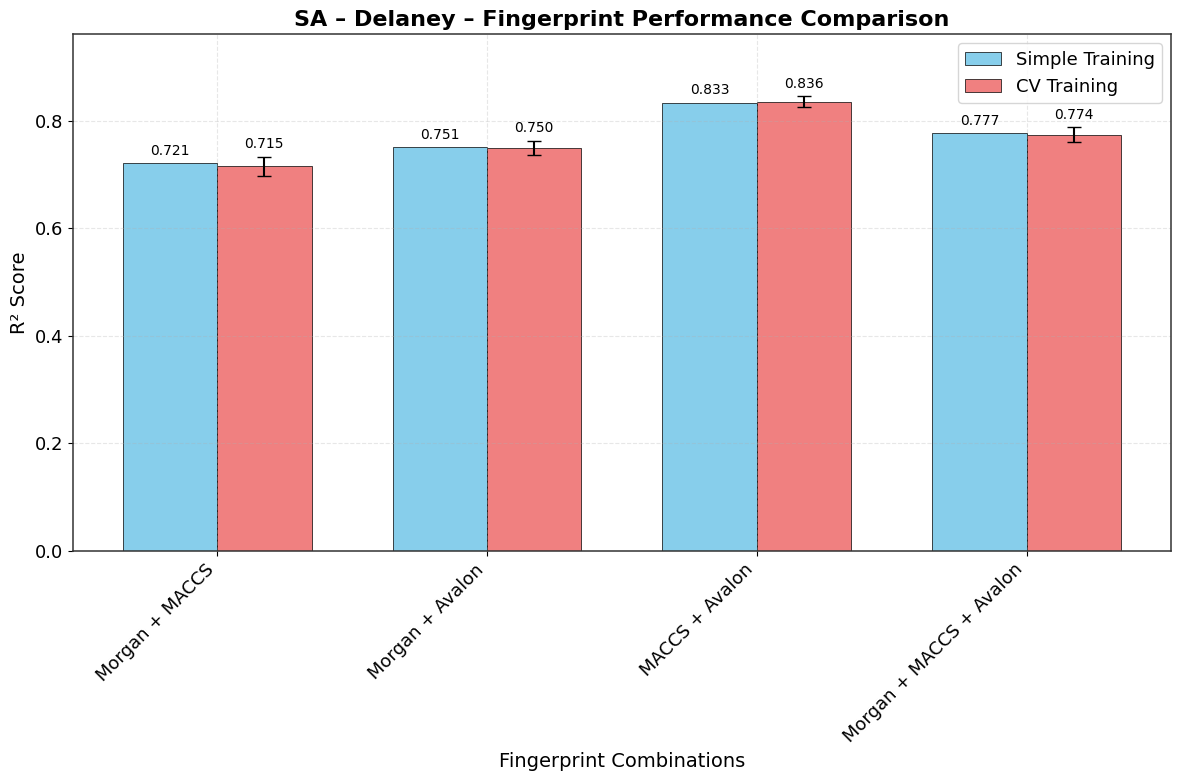

📊  sa_de_fp_bar_comparison.png saved


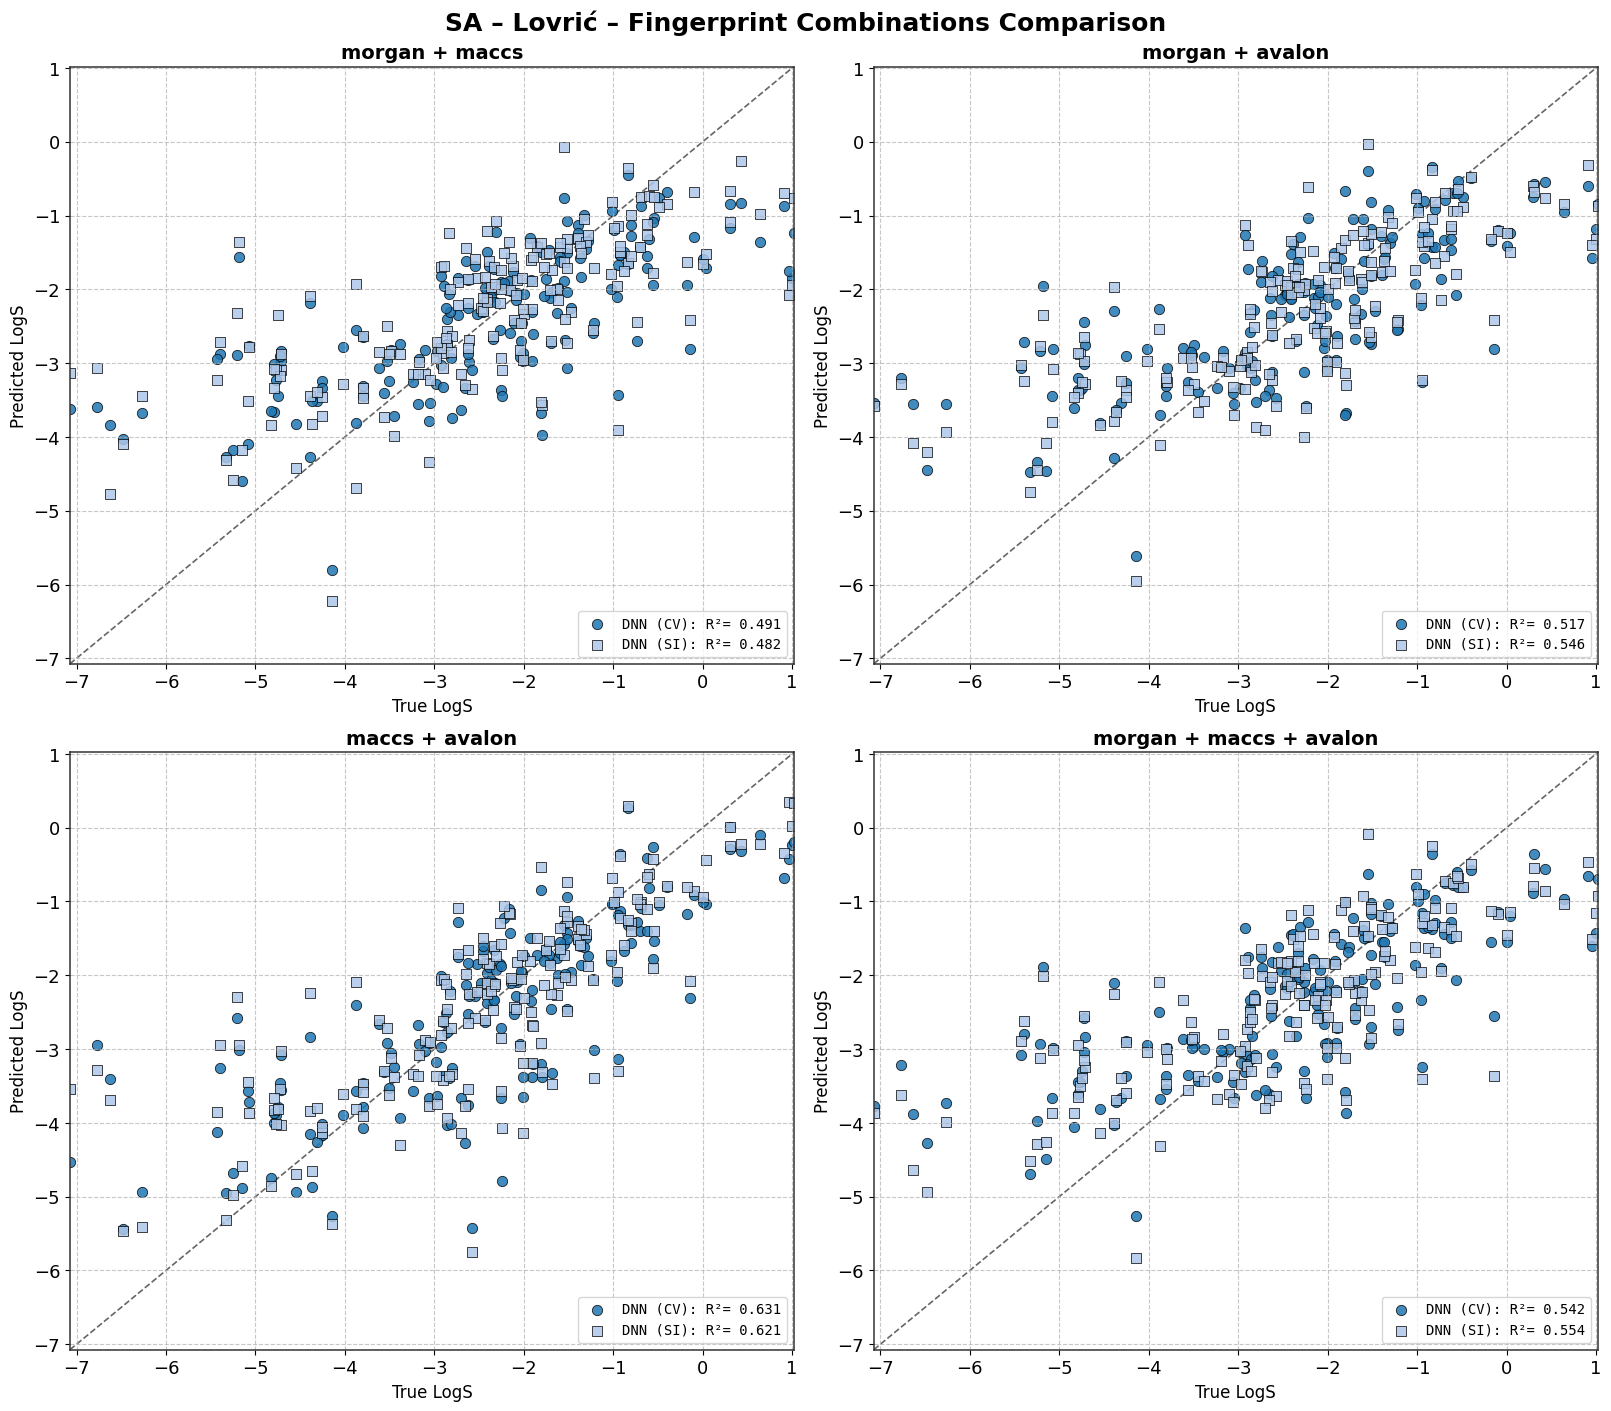

📈  sa_lo_fp_combinations_comparison.png saved


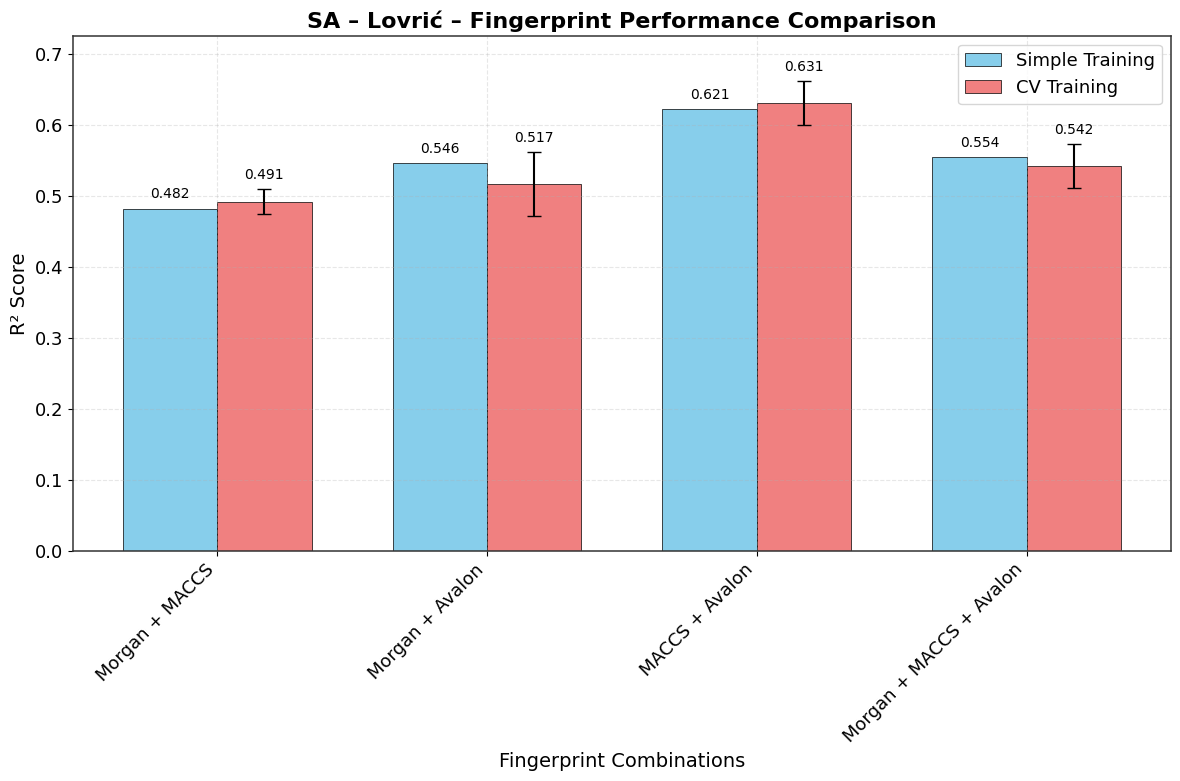

📊  sa_lo_fp_bar_comparison.png saved


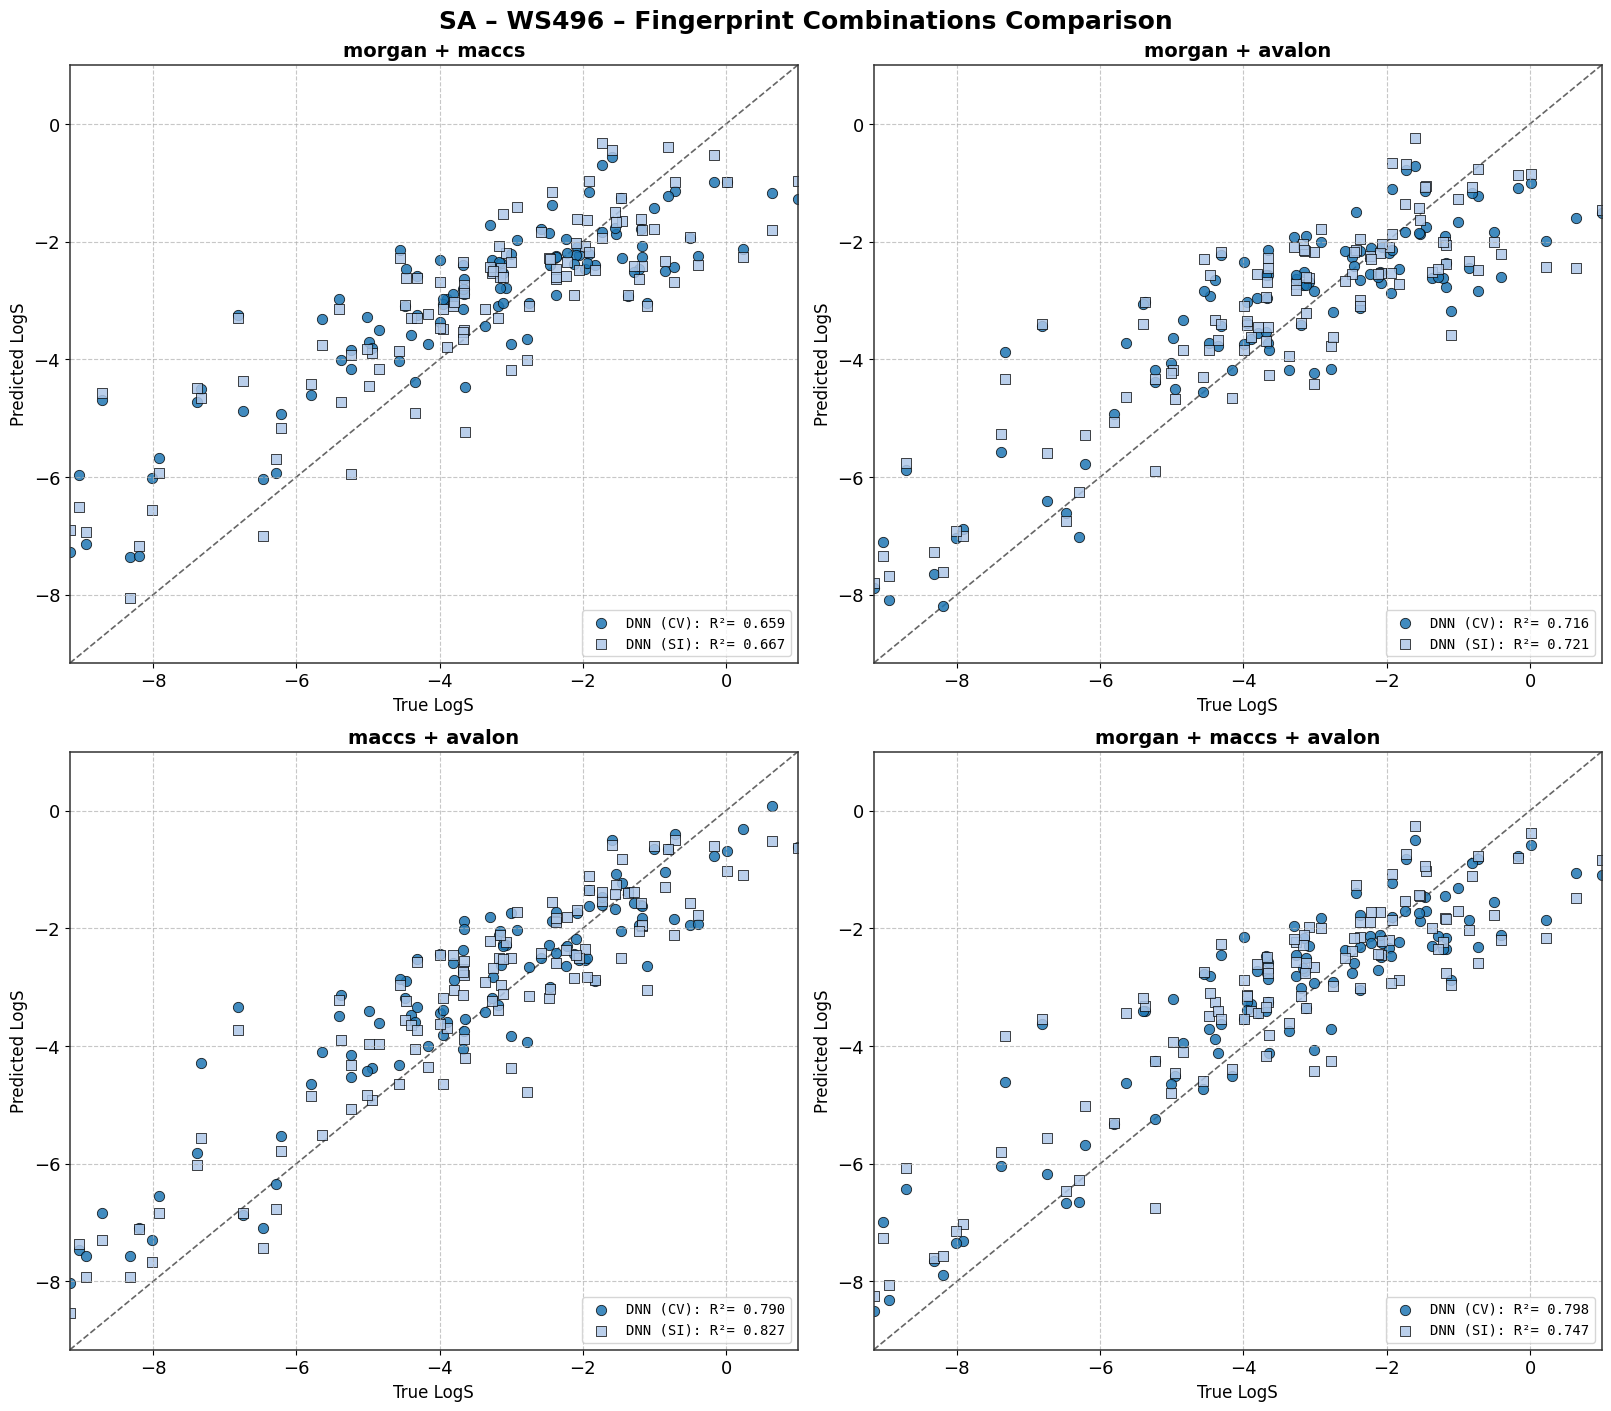

📈  sa_ws_fp_combinations_comparison.png saved


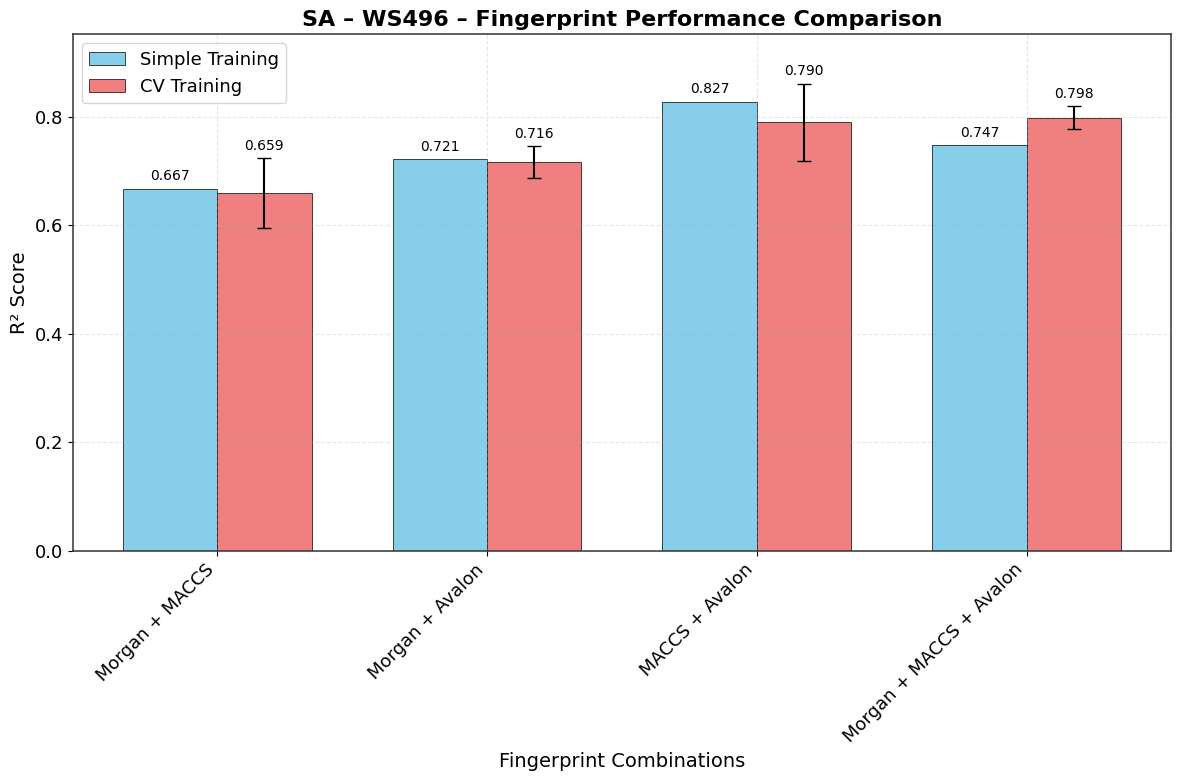

📊  sa_ws_fp_bar_comparison.png saved


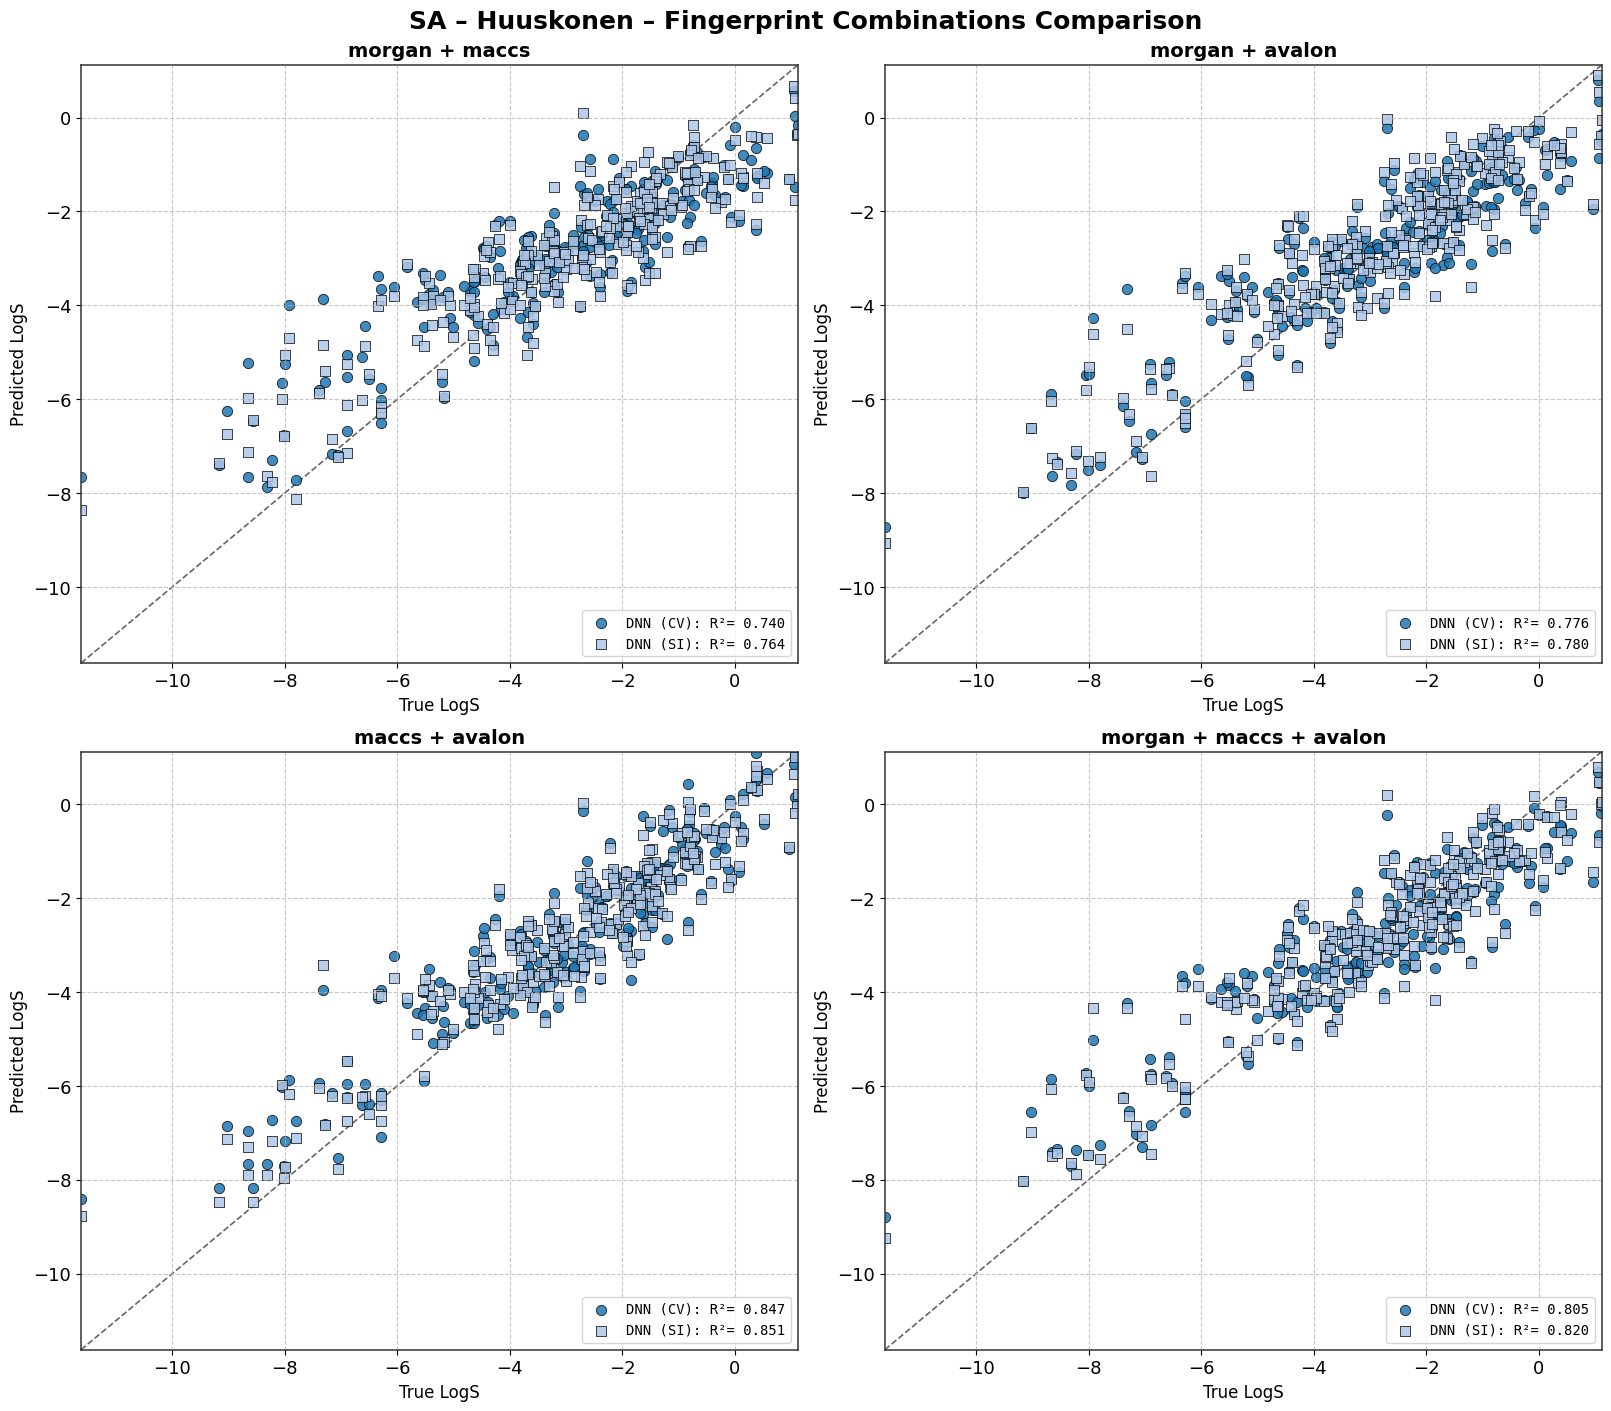

📈  sa_hu_fp_combinations_comparison.png saved


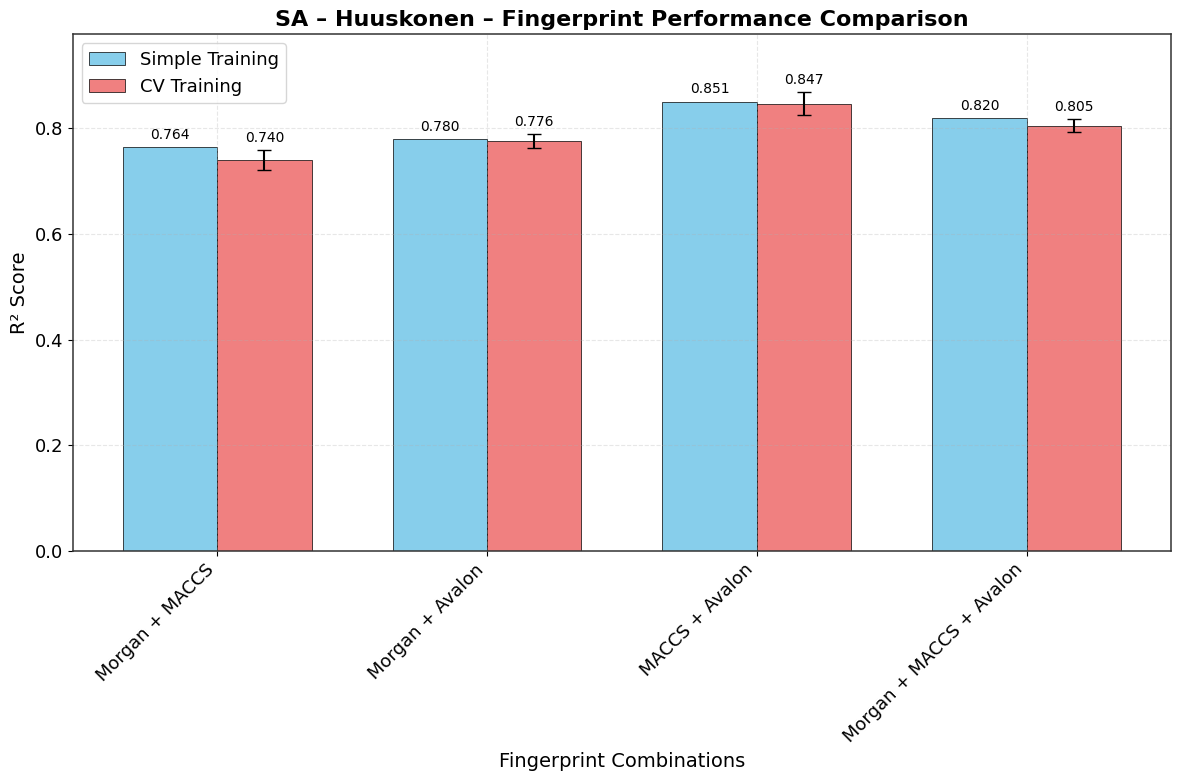

📊  sa_hu_fp_bar_comparison.png saved


In [23]:
# 시각화
print("\nGenerating fingerprint comparison plots...")
for split_type in predictions_by_combo:
    for dataset in ['de', 'lo', 'ws', 'hu']:
        if dataset in predictions_by_combo[split_type].get(list(SELECTED_COMBOS.keys())[0], {}):
            vis_fp_combinations_comparison(predictions_by_combo, split_type, dataset, OUTPUT_DIR)
            vis_fp_combinations_bar_comparison(predictions_by_combo, split_type, dataset, OUTPUT_DIR, results_df)

## Summary

This PyTorch version includes:
1. **DNN with SiLU activation** - Best performing activation from experiments
2. **Subprocess execution** - Memory isolation for large-scale experiments
3. **Mixed precision training** - Faster training with FP16
4. **95:5 train/validation split** - More training data usage
5. **TensorFlow-compatible settings** - BatchNorm momentum, Adam optimizer settings
6. **Cross-platform compatibility** - Works on Windows, Linux, macOS